# Data Mining Project

## Discovery trends of common e-commerce websites

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_tiki = pd.read_csv('tiki_trans.csv', index_col=0)
df_shopee = pd.read_csv('shopee_trans.csv', index_col=0)
df_sendo = pd.read_csv('sendo_trans.csv', index_col=0)
df_lazada = pd.read_csv('lazada_trans.csv', index_col=0)
df_tgdd = pd.read_csv('tgdd_trans.csv', index_col=0)

In [4]:
df_ecom = pd.concat([df_tiki, df_shopee, df_sendo, df_lazada, df_tgdd], axis=1, join='inner')
df_ecom.columns = ['Tiki', 'Shopee', 'Sendo', 'Lazada', 'TGDD']
df_ecom.index = pd.to_datetime(df_ecom.index)
df_ecom = df_ecom.resample('D').mean()
df_ecom

,Tiki,Shopee,Sendo,Lazada,TGDD
2016-12-01,41447,2751,155561,242568,491324
2016-12-02,42889,2589,125871,239124,511396
2016-12-03,43441,2640,121362,240029,472458
2016-12-04,43037,2576,130961,249628,477588
2016-12-05,48207,2886,132564,242779,507007
...,...,...,...,...,...
2021-09-26,188563,1030121,123355,214134,1180378
2021-09-27,199024,995593,122123,196151,1210811
2021-09-28,191469,1043512,110877,200550,1135047
2021-09-29,206103,978626,122125,208693,1241323


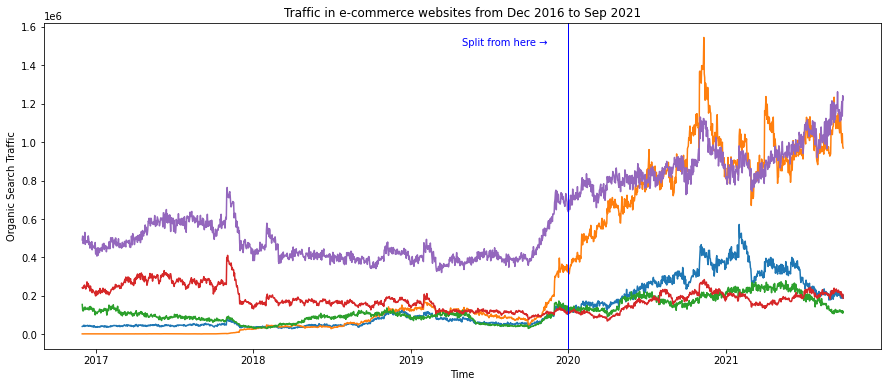

In [5]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 6)
plt.plot(df_ecom)
plt.title('Traffic in e-commerce websites from Dec 2016 to Sep 2021')
plt.xlabel('Time')
plt.ylabel('Organic Search Traffic')
x_axv = df_ecom['2020-01-01':'2020-01-01'].index
x_ann = df_ecom['2019-05-01':'2019-05-01'].index
plt.axvline(x=x_axv, color='blue', linewidth=1)
plt.annotate("Split from here →", (x_ann, 1500000), color = "blue")
plt.show()

In [6]:
df_ecom['Total'] = df_ecom.sum(axis=1)

In [7]:
df_ecom

,Tiki,Shopee,Sendo,Lazada,TGDD,Total
2016-12-01,41447,2751,155561,242568,491324,933651
2016-12-02,42889,2589,125871,239124,511396,921869
2016-12-03,43441,2640,121362,240029,472458,879930
2016-12-04,43037,2576,130961,249628,477588,903790
2016-12-05,48207,2886,132564,242779,507007,933443
...,...,...,...,...,...,...
2021-09-26,188563,1030121,123355,214134,1180378,2736551
2021-09-27,199024,995593,122123,196151,1210811,2723702
2021-09-28,191469,1043512,110877,200550,1135047,2681455
2021-09-29,206103,978626,122125,208693,1241323,2756870


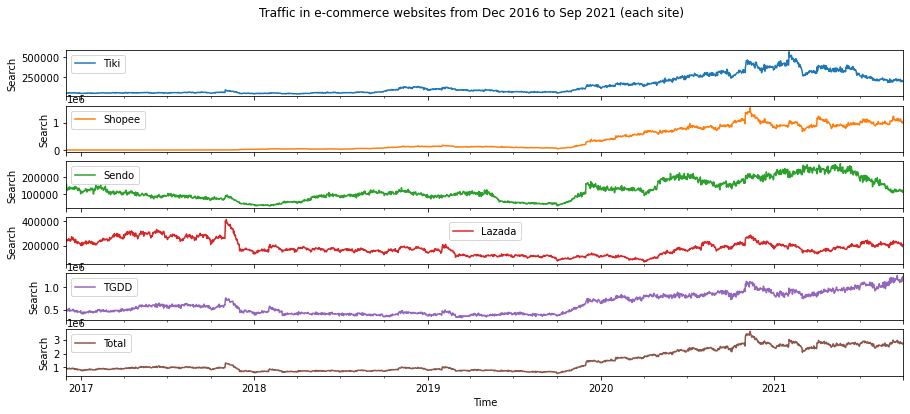

In [8]:
df_ecom.plot(
    subplots=True,
    title='Traffic in e-commerce websites from Dec 2016 to Sep 2021 (each site)',
    xlabel='Time', ylabel='Search'
)
plt.show()

In [9]:
df_ecom.describe()

,Tiki,Shopee,Sendo,Lazada,TGDD,Total
count,1765.000000,1.765000e+03,1765.000000,1765.000000,1.765000e+03,1.765000e+03
mean,138748.399433,3.514974e+05,121296.075921,183050.120113,6.184618e+05,1.413054e+06
std,119538.002597,4.052592e+05,59039.693658,59563.672494,2.272079e+05,7.859919e+05
min,29085.000000,2.161000e+03,30555.000000,70059.000000,3.215730e+05,5.567200e+05
25%,47605.000000,3.657700e+04,82126.000000,137643.000000,4.165130e+05,7.843320e+05
50%,79202.000000,1.165250e+05,107810.000000,173475.000000,5.483270e+05,9.743750e+05
75%,214804.000000,7.859620e+05,158682.000000,218600.000000,8.164700e+05,2.234307e+06
max,571538.000000,1.543885e+06,279158.000000,410927.000000,1.261507e+06,3.589983e+06


## Identify trend

### 1. Linear Interpolation & Linear Regression

Can only be done with the assumption that the data has only LINEAR trend component.

In [16]:
def line_segmentation(X, y, seg_no):
    slope = (y[-1] - y[0]) / (len(X) - 1)
    intercept = y[-1] - slope * (X[-1] - 1)
    print("Line segmentation (segment {}): slope={}, intercept={}".format(seg_no, slope, intercept))
    return slope, intercept

In [22]:
def least_squared(X, y, seg_no):
    mean_X = X.mean()
    mean_y = y.mean()

    Sxy = np.sum((X - mean_X) * (y - mean_y), axis=0)
    Sxx = np.sum(np.power(X - mean_X, 2), axis=0)

    slope = Sxy / Sxx
    intercept = mean_y - slope * mean_X
    
    print("Line regression (segment {}): slope={}, intercept={}".format(seg_no, slope, intercept))
    return slope, intercept

In [23]:
def trend_by_segment(X, y, segment=1126):
    s1, in1 = least_squared(X[:segment + 1], y[:segment + 1], 1)
    s2, in2 = least_squared(X[segment:] - segment, y[segment:], 2)
    
    s3, in3 = line_segmentation(X[:segment + 1], y[:segment + 1], 1)
    s4, in4 = line_segmentation(X[segment:], y[segment:], 2)
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 6))
    plt.title(y.name)
    ax1.plot(X, y, label='Actual Data')
    ax2.plot(X[:segment+1], s1 * X[:segment+1] + in1)
    ax2.plot(X[segment:], s2 * (X[segment:] - segment) + in2)
    ax3.plot(X[:segment+1], s3 * X[:segment+1] + in3)
    ax3.plot(X[segment:], s4 * X[segment:] + in4)
    plt.show()

Line regression (segment 1): slope=45.93827338165924, intercept=34849.02626536276
Line regression (segment 2): slope=235.3280952893432, intercept=201255.43775919406
Line segmentation (segment 1): slope=55.150976909413856, intercept=41502.15097690941
Line segmentation (segment 2): slope=132.57210031347964, intercept=-45596.612852664606


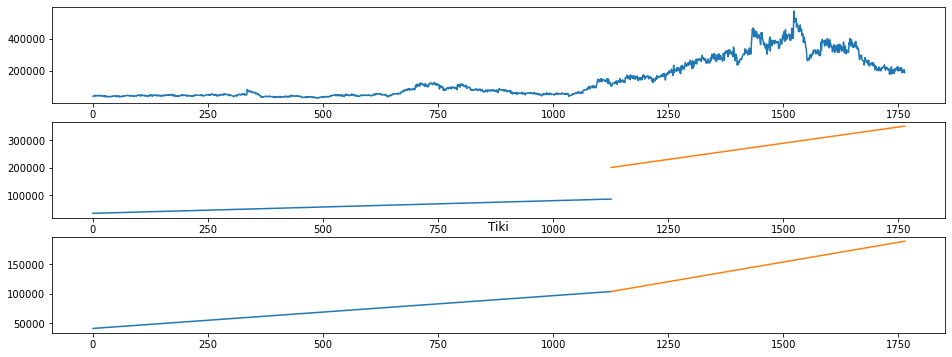

Line regression (segment 1): slope=169.46568780452603, intercept=-30072.121896769808
Line regression (segment 2): slope=850.583747074926, intercept=584871.2792057903
Line segmentation (segment 1): slope=316.01776198934283, intercept=3067.017761989322
Line segmentation (segment 2): slope=956.5830721003135, intercept=-717568.9561128528


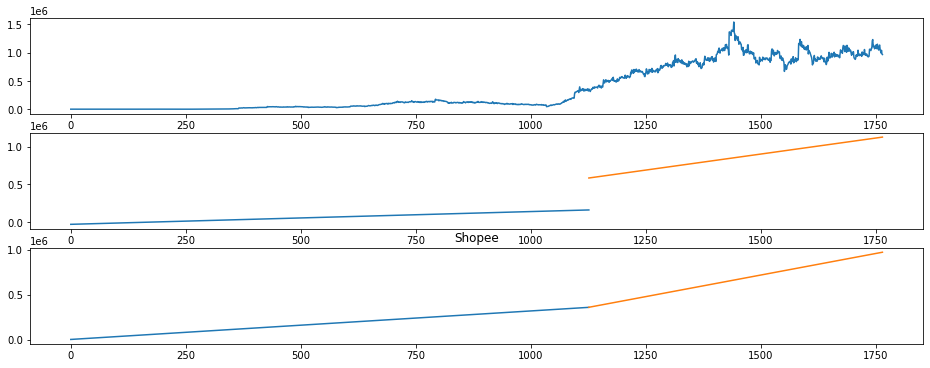

Line regression (segment 1): slope=-172.00269095697823, intercept=283622.81580735906
Line regression (segment 2): slope=158.24463409900363, intercept=125884.20428892801
Line segmentation (segment 1): slope=-108.56571936056838, intercept=242459.43428063943
Line segmentation (segment 2): slope=105.62539184952978, intercept=1494.434169279004


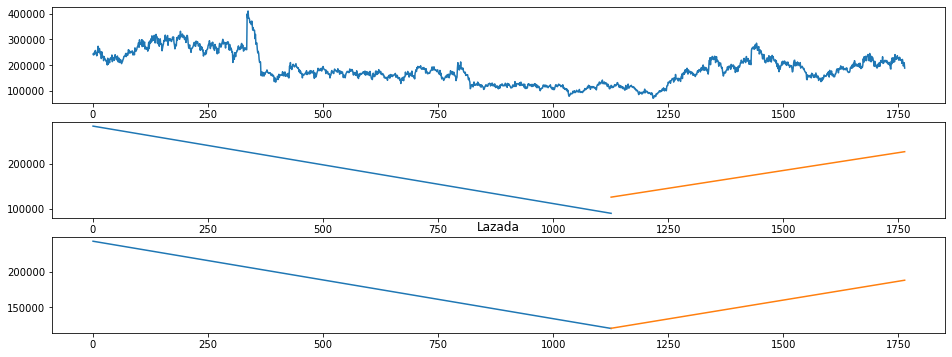

Line regression (segment 1): slope=-17.762002931973985, intercept=95802.48591157093
Line regression (segment 2): slope=106.14014314465686, intercept=150050.27086267606
Line segmentation (segment 1): slope=-23.007104795737124, intercept=155537.99289520425
Line segmentation (segment 2): slope=-25.960815047021942, intercept=158860.9169278997


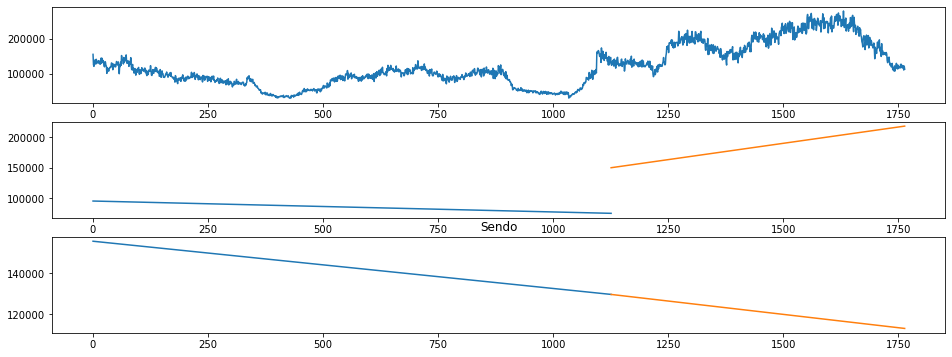

Line regression (segment 1): slope=-93.54055334553905, intercept=518266.7379221809
Line regression (segment 2): slope=515.693273893623, intercept=723611.3432805163
Line segmentation (segment 1): slope=147.23001776198933, intercept=491471.230017762
Line segmentation (segment 2): slope=882.692789968652, intercept=-335924.38871473353


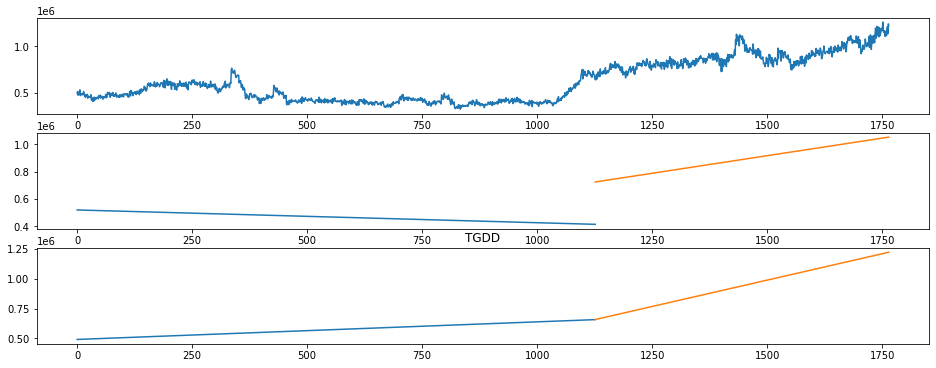

Line regression (segment 1): slope=-67.90128604830595, intercept=902468.9440097038
Line regression (segment 2): slope=1865.9898935015526, intercept=1785672.535397105
Line segmentation (segment 1): slope=386.8259325044405, intercept=934037.8259325044
Line segmentation (segment 2): slope=2051.512539184953, intercept=-938734.6065830719


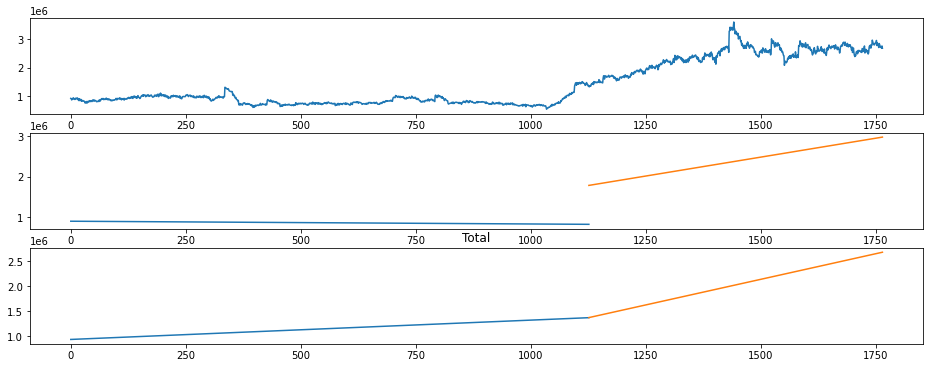

In [24]:
trend_by_segment(np.arange(len(df_ecom)), df_ecom['Tiki'])
trend_by_segment(np.arange(len(df_ecom)), df_ecom['Shopee'])
trend_by_segment(np.arange(len(df_ecom)), df_ecom['Lazada'])
trend_by_segment(np.arange(len(df_ecom)), df_ecom['Sendo'])
trend_by_segment(np.arange(len(df_ecom)), df_ecom['TGDD'])
trend_by_segment(np.arange(len(df_ecom)), df_ecom['Total'])

### 3. Moving Average

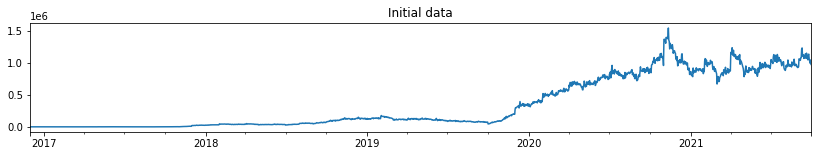

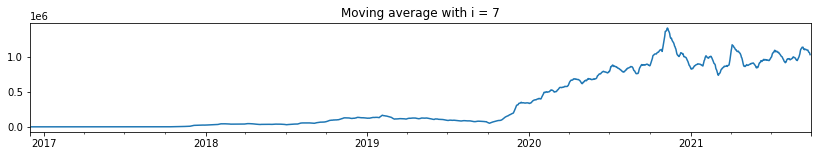

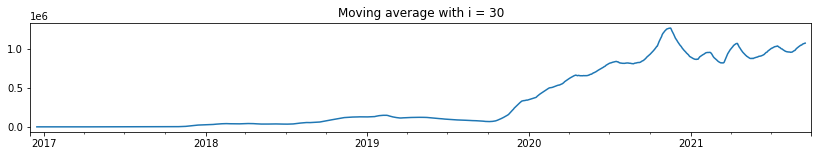

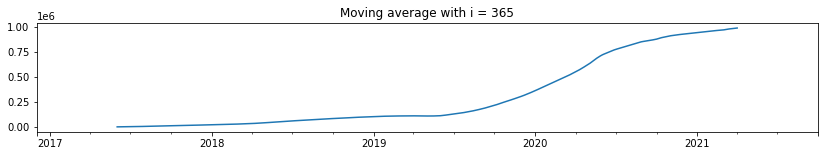

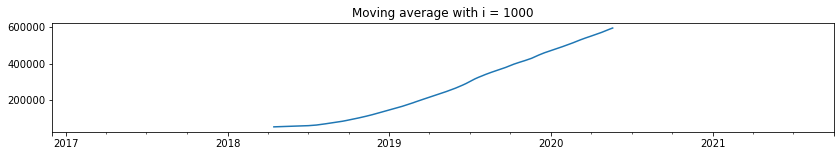

In [30]:
def moving_average(df, windows):
    plt.rcParams["figure.figsize"] = (14, 2)
    df.plot()
    plt.title('Initial data')
    plt.show()
    for i in windows:
        df.rolling(window=i, center=True).mean().plot()
        plt.title('Moving average with i = {}'.format(i))
        plt.show()
        
moving_average(df_ecom['Shopee'], [7, 30, 365, 1000])

## Considering seasonal aspects

Each part will consider 2 segments of data, before 2020 and overall.

1. Percentage of traffic grouped by days of the week

In [31]:
df_ecom['day_of_week'] = df_ecom.index.day_of_week

,Tiki,Shopee,Sendo,Lazada,TGDD,Total
day_of_week,,,,,,
0,14.376330,14.308777,14.272433,14.186200,14.266847,14.260833
1,14.290392,14.229419,14.148191,14.181227,14.237006,14.219310
2,14.374978,14.659561,14.498679,14.284444,14.449611,14.429415
3,14.248744,14.250499,14.336315,14.492701,14.347410,14.363452
4,14.373325,14.256273,14.316550,14.375095,14.380295,14.362977
5,14.125491,13.951417,14.050716,14.212470,14.097499,14.108625
6,14.210739,14.344054,14.377115,14.267863,14.221332,14.255389


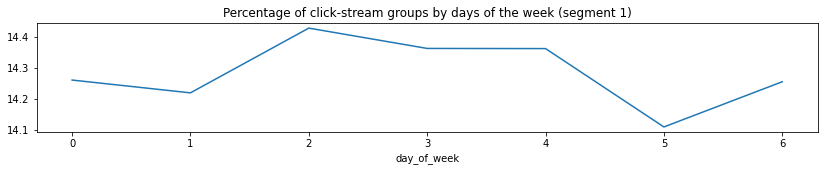

In [32]:
plt.rcParams["figure.figsize"] = (14, 2)
display(df_ecom[:'2020-01-01'].groupby('day_of_week').mean() / df_ecom[:'2020-01-01'].groupby('day_of_week').mean().sum(axis=0) * 100)
(df_ecom[:'2020-01-01'].groupby('day_of_week').mean() / df_ecom[:'2020-01-01'].groupby('day_of_week').mean().sum(axis=0) * 100)['Total'].plot()
plt.title('Percentage of click-stream groups by days of the week (segment 1)')
plt.show()

,Tiki,Shopee,Sendo,Lazada,TGDD,Total
day_of_week,,,,,,
0,14.383075,14.217812,14.234197,14.223541,14.260187,14.254488
1,14.401629,14.279880,14.223074,14.275113,14.322561,14.305190
2,14.311749,14.366681,14.374515,14.410981,14.385736,14.371300
3,14.390234,14.370221,14.311867,14.191629,14.372865,14.355793
4,14.221618,14.369184,14.416953,14.417466,14.273248,14.323539
5,14.062148,14.089550,14.134672,14.145197,14.119114,14.105005
6,14.229547,14.306672,14.304723,14.336075,14.266289,14.284685


Text(0.5, 1.0, 'Percentage of click-stream groups by days of the week (segment 2)')

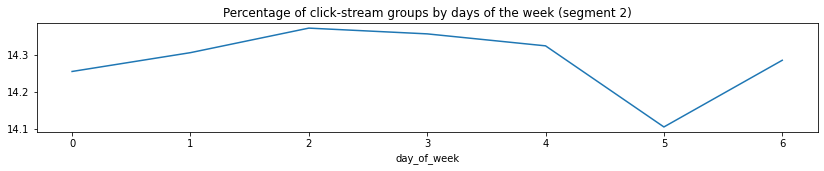

In [33]:
plt.rcParams["figure.figsize"] = (14, 2)
display(df_ecom['2020-01-01':].groupby('day_of_week').mean() / df_ecom['2020-01-01':].groupby('day_of_week').mean().sum(axis=0) * 100)
(df_ecom['2020-01-01':].groupby('day_of_week').mean() / df_ecom['2020-01-01':].groupby('day_of_week').mean().sum(axis=0) * 100)['Total'].plot()
plt.title('Percentage of click-stream groups by days of the week (segment 2)')

2. Percentage of traffic grouped by days of the week

In [34]:
df_ecom['day'] = df_ecom.index.day

,Tiki,Shopee,Sendo,Lazada,TGDD,Total,day_of_week
day,,,,,,,
1,3.102254,3.301884,3.253075,3.046463,3.214664,3.180868,3.369075
2,3.098120,2.974544,3.185008,3.130356,3.187053,3.152292,3.256594
3,3.160745,3.005243,3.252421,3.202719,3.188799,3.182268,3.314748
4,3.135901,3.032331,3.208273,3.204857,3.207295,3.188620,3.169364
5,3.203931,3.092356,3.273910,3.227640,3.193744,3.202067,3.023980
6,3.201302,3.151994,3.286692,3.284982,3.212996,3.230420,3.082134
7,3.190009,3.160378,3.229458,3.279035,3.248960,3.242679,3.343824
8,3.236235,3.188577,3.224857,3.333505,3.225123,3.246512,3.401978
9,3.255470,3.150686,3.297901,3.351650,3.235508,3.261764,3.256594


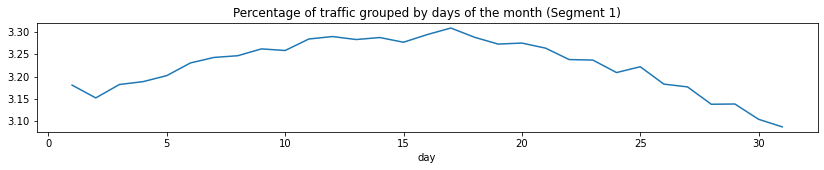

In [35]:
display(df_ecom[:'2020-01-01'].groupby('day').mean() / df_ecom[:'2020-01-01'].groupby('day').mean().sum(axis=0) * 100)
(df_ecom[:'2020-01-01'].groupby('day').mean() / df_ecom[:'2020-01-01'].groupby('day').mean().sum(axis=0) * 100)['Total'].plot()
plt.title('Percentage of traffic grouped by days of the month (Segment 1)')
plt.show()

,Tiki,Shopee,Sendo,Lazada,TGDD,Total,day_of_week
day,,,,,,,
1,3.166352,3.079607,3.138554,3.003291,3.146776,3.113644,3.124225
2,3.084862,3.107970,3.290787,3.077341,3.162413,3.137465,3.124225
3,3.185031,3.131154,3.202791,3.124929,3.166096,3.155519,3.124225
4,3.241486,3.153838,3.230814,3.130279,3.205040,3.187319,3.482743
5,3.197054,3.200789,3.253068,3.199855,3.209950,3.207744,3.482743
6,3.248924,3.256507,3.277983,3.210359,3.215757,3.238660,3.124225
7,3.235744,3.263140,3.225636,3.223423,3.204279,3.232155,3.124225
8,3.273243,3.283653,3.249468,3.269905,3.192168,3.244641,3.124225
9,3.293551,3.318021,3.302345,3.309658,3.188106,3.264863,3.124225


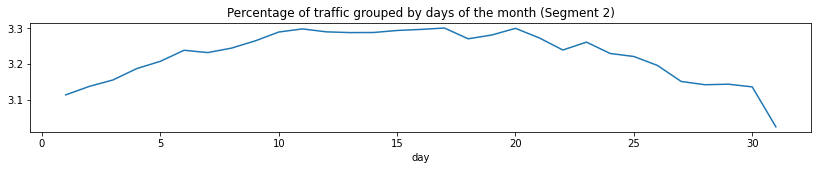

In [36]:
display(df_ecom['2020-01-01':].groupby('day').mean() / df_ecom['2020-01-01':].groupby('day').mean().sum(axis=0) * 100)
(df_ecom['2020-01-01':].groupby('day').mean() / df_ecom['2020-01-01':].groupby('day').mean().sum(axis=0) * 100)['Total'].plot()
plt.title('Percentage of traffic grouped by days of the month (Segment 2)')
plt.show()

In [37]:
df_month = df_ecom.resample('M').sum()
df_month['month'] = df_month.index.month

In [38]:
df_month[:'2020-01-01'].groupby('month').mean() / df_month[:'2020-01-01'].groupby('month').mean().sum(axis=0) * 100

,Tiki,Shopee,Sendo,Lazada,TGDD,Total,day_of_week,day
month,,,,,,,,
1,7.929799,7.508192,8.069894,8.108756,7.748478,7.853684,8.161401,8.644127
2,8.106007,8.057337,7.892954,8.220754,7.787662,7.934489,7.674153,7.075636
3,7.591885,7.126840,8.872549,8.451108,7.498596,7.821157,8.770461,8.644127
4,7.198666,7.425793,8.682248,8.645024,7.811102,8.007744,8.222307,8.103869
5,8.002308,7.293112,9.126504,8.816522,8.369860,8.436962,8.222307,8.644127
6,6.948080,6.524603,7.519672,8.695157,8.382277,8.127721,8.496384,8.103869
7,7.085255,6.030002,7.669519,8.339197,8.454272,8.077036,8.313666,8.644127
8,7.334197,6.554000,7.657131,8.218104,8.474568,8.116440,8.496384,8.644127
9,7.227971,6.338256,7.496714,7.970978,7.992159,7.763091,8.465931,8.103869


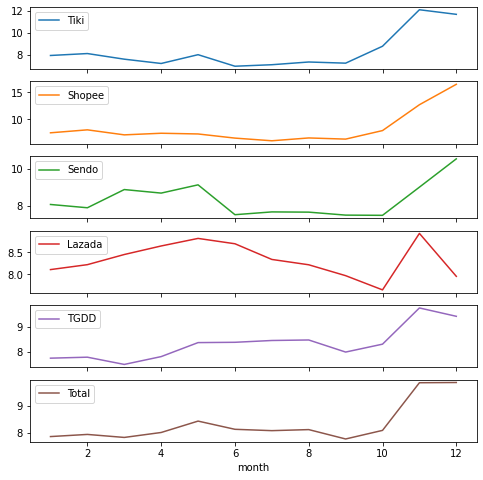

In [41]:
plt.rcParams["figure.figsize"] = (8, 8)
(df_month[:'2020-01-01'].groupby('month').mean() / df_month[:'2020-01-01'].groupby('month').mean().sum(axis=0) * 100)[['Tiki', 'Shopee', 'Sendo', 'Lazada', 'TGDD', 'Total']].plot(subplots=True)
plt.show()

In [24]:
df_month['2020-01-01':].groupby('month').mean() / df_month['2020-01-01':].groupby('month').mean().sum(axis=0) * 100

,Tiki,Shopee,Sendo,Lazada,TGDD,Total,day_of_week,day
month,,,,,,,,
1,7.919432,5.990807,8.233336,7.332812,7.321914,6.977596,8.759124,8.622338
2,8.244521,6.425190,7.462605,6.496794,7.317904,7.051348,7.892336,7.309865
3,6.772156,6.627225,8.564171,5.708477,7.340830,6.984554,8.120438,8.622338
4,7.530244,8.069419,8.050548,5.647628,7.877982,7.752616,8.211679,8.083442
5,7.862043,7.401550,9.994735,7.436028,8.219006,7.955406,8.850365,8.622338
6,8.232107,7.878995,9.555982,8.166749,8.236328,8.200614,7.846715,8.083442
7,7.548869,8.990932,8.722464,9.263101,8.869901,8.776872,8.622263,8.622338
8,7.247505,8.519563,7.425017,9.753677,8.883287,8.513158,8.485401,8.622338
9,7.296666,8.963207,6.102698,9.058240,9.403954,8.719385,8.029197,8.083442


3. Percentage of traffic grouped by month of the year

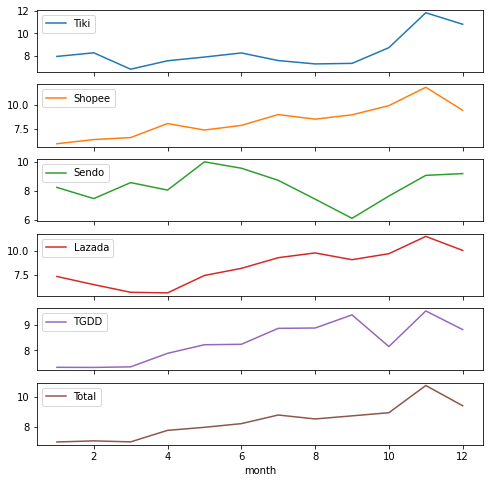

In [42]:
(df_month['2020-01-01':].groupby('month').mean() / df_month['2020-01-01':].groupby('month').mean().sum(axis=0) * 100)[['Tiki', 'Shopee', 'Sendo', 'Lazada', 'TGDD', 'Total']].plot(subplots=True)
plt.show()

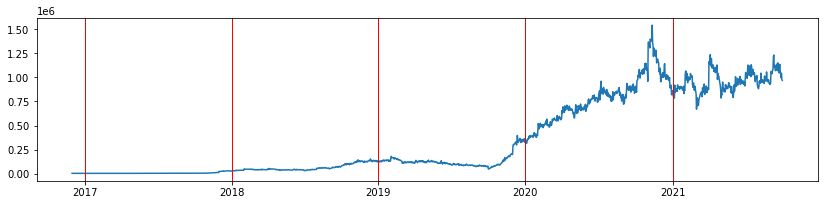

In [26]:
plt.rcParams["figure.figsize"] = (14, 3)
plt.plot(df_ecom['Shopee'])
x0 = df_ecom['2017-01-01':'2017-01-01'].index
x1 = df_ecom['2018-01-01':'2018-01-01'].index
x2 = df_ecom['2019-01-01':'2019-01-01'].index
x3 = df_ecom['2020-01-01':'2020-01-01'].index
x4 = df_ecom['2021-01-01':'2021-01-01'].index
plt.axvline(x=x0, color='red', linewidth=1)
plt.axvline(x=x1, color='red', linewidth=1)
plt.axvline(x=x2, color='red', linewidth=1)
plt.axvline(x=x3, color='red', linewidth=1)
plt.axvline(x=x4, color='red', linewidth=1)
plt.show()

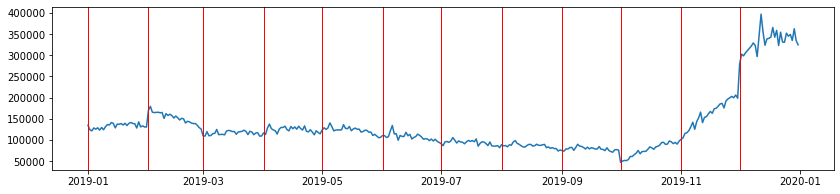

In [27]:
plt.rcParams["figure.figsize"] = (14, 3)
plt.plot(df_ecom['Shopee']['2019':'2019'])
x0 = df_ecom['2019-01-01':'2019-01-01'].index
x1 = df_ecom['2019-02-01':'2019-02-01'].index
x2 = df_ecom['2019-03-01':'2019-03-01'].index
x3 = df_ecom['2019-04-01':'2019-04-01'].index
x4 = df_ecom['2019-05-01':'2019-05-01'].index
x5 = df_ecom['2019-06-01':'2019-06-01'].index
x6 = df_ecom['2019-07-01':'2019-07-01'].index
x7 = df_ecom['2019-08-01':'2019-08-01'].index
x8 = df_ecom['2019-09-01':'2019-09-01'].index
x9 = df_ecom['2019-10-01':'2019-10-01'].index
x10 = df_ecom['2019-11-01':'2019-11-01'].index
x11 = df_ecom['2019-12-01':'2019-12-01'].index

plt.axvline(x=x0, color='red', linewidth=1)
plt.axvline(x=x1, color='red', linewidth=1)
plt.axvline(x=x2, color='red', linewidth=1)
plt.axvline(x=x3, color='red', linewidth=1)
plt.axvline(x=x4, color='red', linewidth=1)
plt.axvline(x=x5, color='red', linewidth=1)
plt.axvline(x=x6, color='red', linewidth=1)
plt.axvline(x=x7, color='red', linewidth=1)
plt.axvline(x=x8, color='red', linewidth=1)
plt.axvline(x=x9, color='red', linewidth=1)
plt.axvline(x=x10, color='red', linewidth=1)
plt.axvline(x=x11, color='red', linewidth=1)
plt.show()

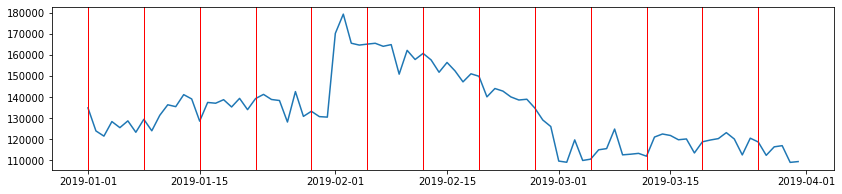

In [28]:
plt.rcParams["figure.figsize"] = (14, 3)
plt.plot(df_ecom['Shopee']['2019-01':'2019-03'])
x0 = df_ecom['2019-01-01':'2019-01-01'].index
x1 = df_ecom['2019-01-08':'2019-01-08'].index
x2 = df_ecom['2019-01-15':'2019-01-15'].index
x3 = df_ecom['2019-01-22':'2019-01-22'].index
x4 = df_ecom['2019-01-29':'2019-01-29'].index
x5 = df_ecom['2019-02-05':'2019-02-05'].index
x6 = df_ecom['2019-02-12':'2019-02-12'].index
x7 = df_ecom['2019-02-19':'2019-02-19'].index
x8 = df_ecom['2019-02-26':'2019-02-26'].index
x9 = df_ecom['2019-03-05':'2019-03-05'].index
x10 = df_ecom['2019-03-12':'2019-03-12'].index
x11 = df_ecom['2019-03-19':'2019-03-19'].index
x12 = df_ecom['2019-03-26':'2019-03-26'].index

plt.axvline(x=x0, color='red', linewidth=1)
plt.axvline(x=x1, color='red', linewidth=1)
plt.axvline(x=x2, color='red', linewidth=1)
plt.axvline(x=x3, color='red', linewidth=1)
plt.axvline(x=x4, color='red', linewidth=1)
plt.axvline(x=x5, color='red', linewidth=1)
plt.axvline(x=x6, color='red', linewidth=1)
plt.axvline(x=x7, color='red', linewidth=1)
plt.axvline(x=x8, color='red', linewidth=1)
plt.axvline(x=x9, color='red', linewidth=1)
plt.axvline(x=x10, color='red', linewidth=1)
plt.axvline(x=x11, color='red', linewidth=1)
plt.axvline(x=x12, color='red', linewidth=1)
plt.show()

# Seasonal Decomposition

1. Classical decomposition

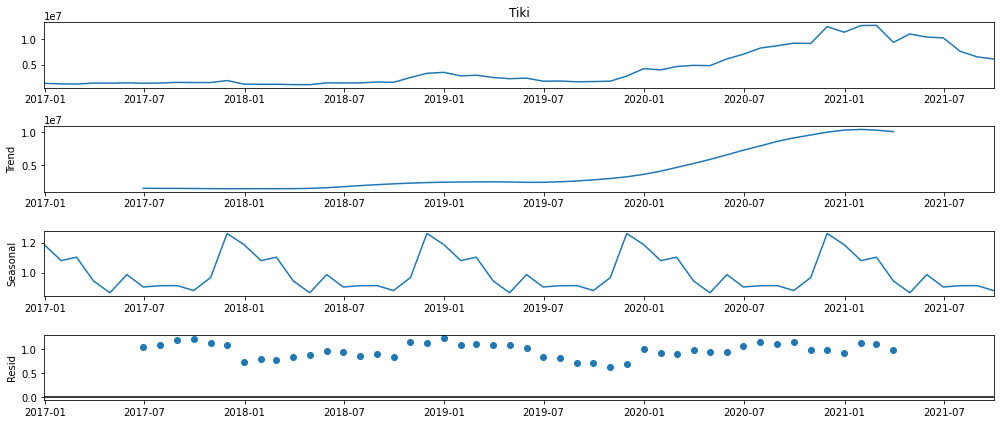

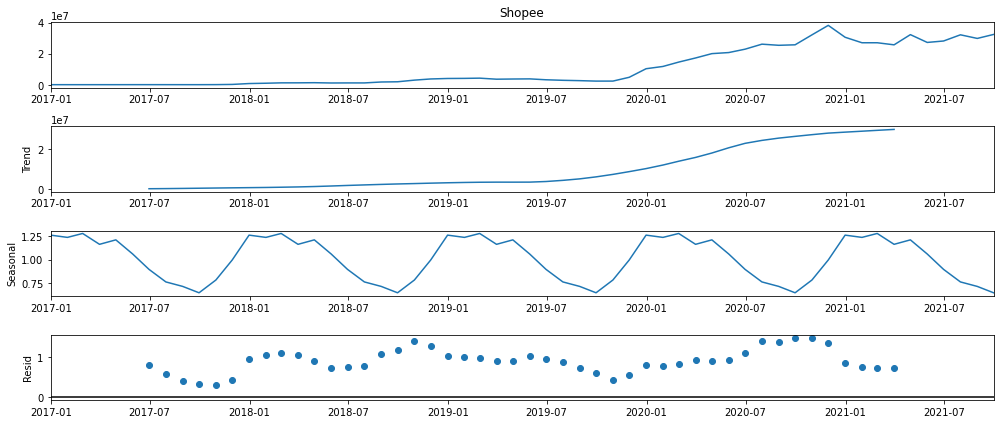

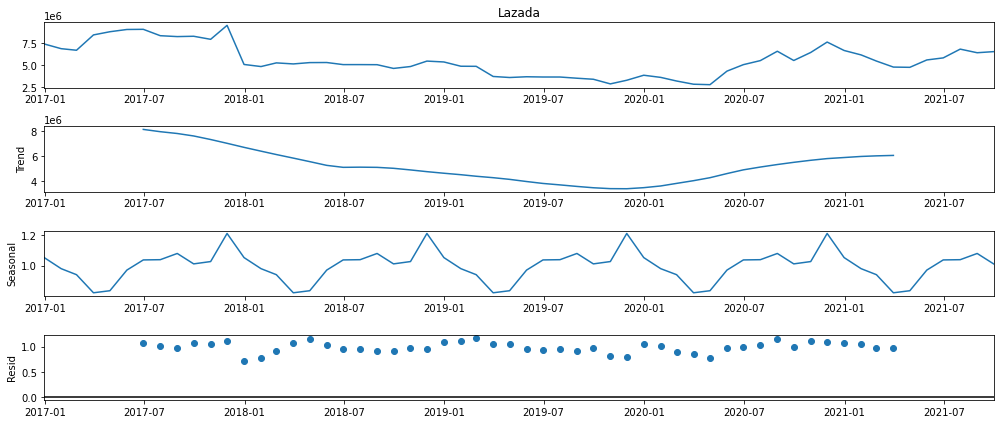

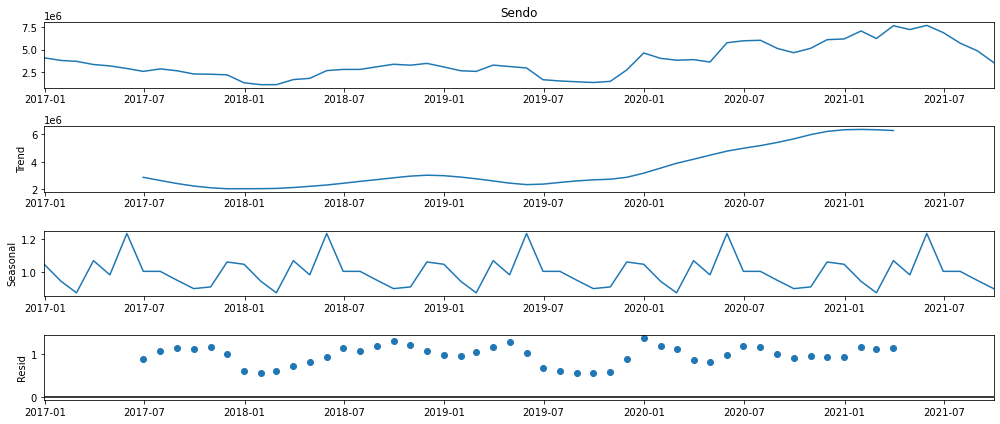

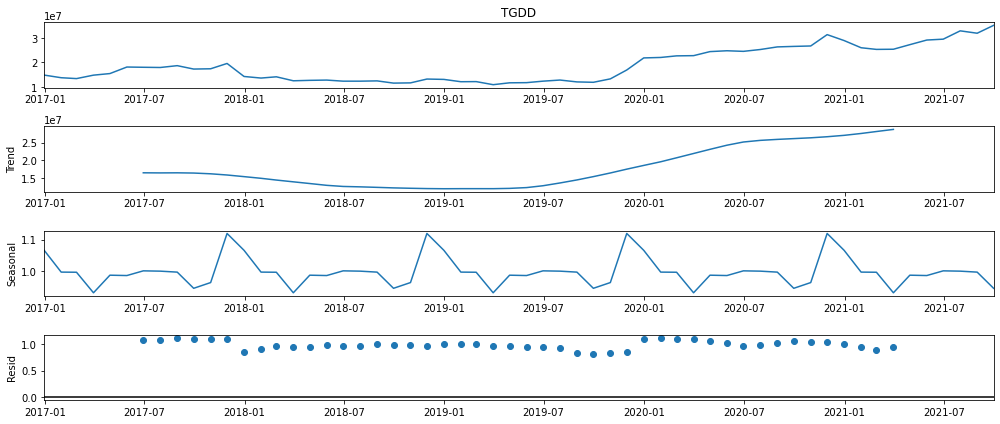

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams["figure.figsize"] = (14, 6)
seasonal_decompose(df_month['Tiki'], model='multiplicative').plot()
seasonal_decompose(df_month['Shopee'], model='multiplicative').plot()
seasonal_decompose(df_month['Lazada'], model='multiplicative').plot()
seasonal_decompose(df_month['Sendo'], model='multiplicative').plot()
seasonal_decompose(df_month['TGDD'], model='multiplicative').plot()
plt.show()

2. STL (Seasonal-Trend decomposition using Loses)

STL has several advantages over the classical, SEATS and X11 decomposition methods:
- (Most important) The seasonal component is allowed to change over time, and the rate of change can be controlled by the user.
- The smoothness of the trend-cycle can also be controlled by the user.
- It can be robust to outliers (i.e., the user can specify a robust decomposition), so that occasional unusual observations will not affect the estimates of the trend-cycle and seasonal components. They will, however, affect the remainder component.

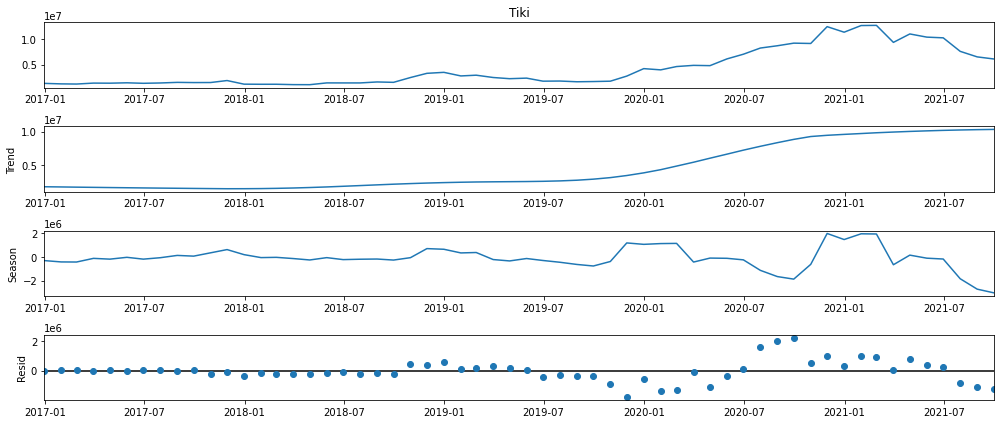

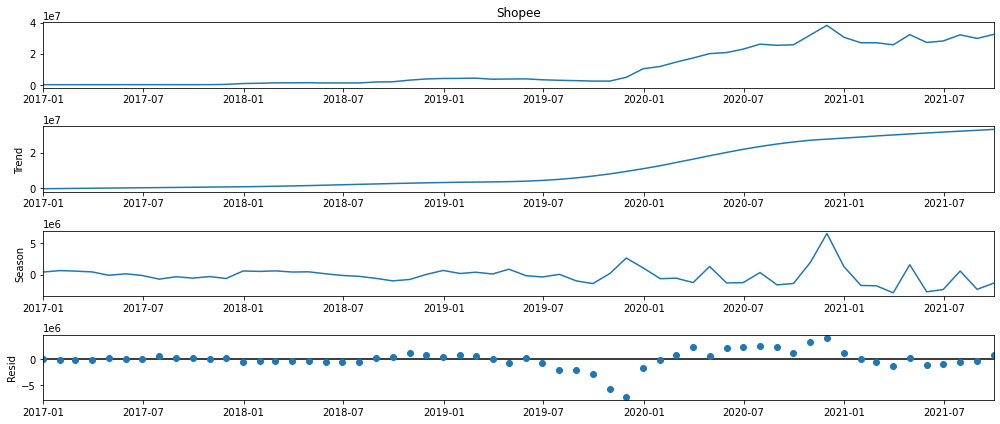

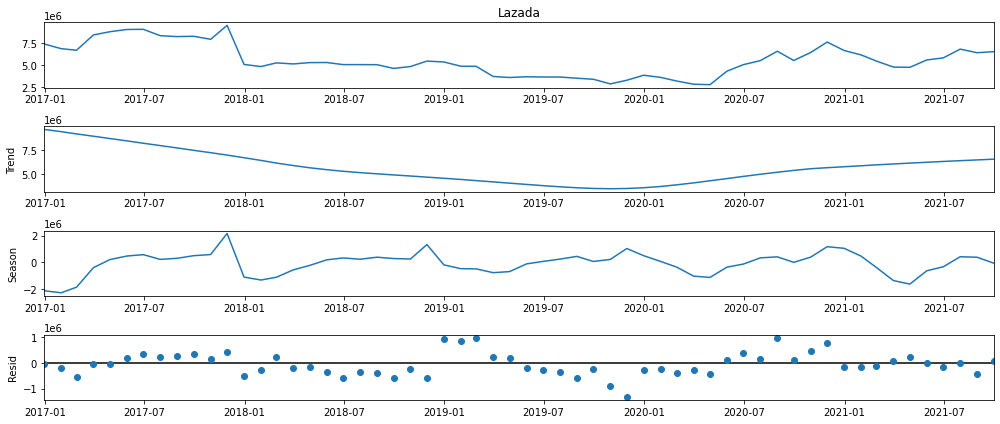

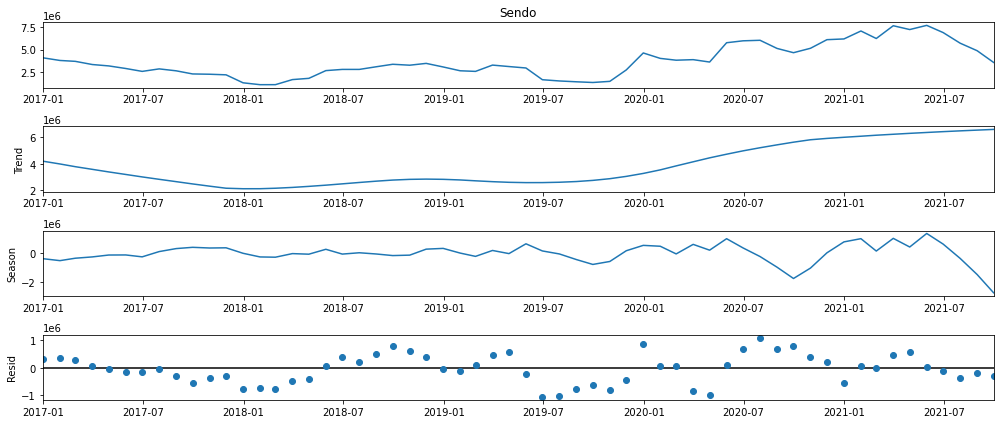

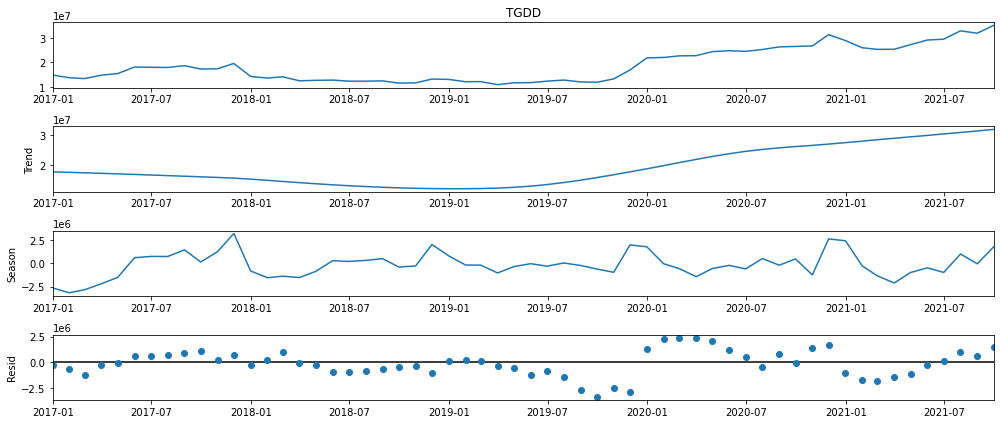

In [43]:
from statsmodels.tsa.seasonal import STL

plt.rcParams["figure.figsize"] = (14, 6)
STL(df_month['Tiki'], period=12).fit().plot()
STL(df_month['Shopee'], period=12).fit().plot()
STL(df_month['Lazada'], period=12).fit().plot()
STL(df_month['Sendo'], period=12).fit().plot()
STL(df_month['TGDD'], period=12).fit().plot()
plt.show()